In [72]:
import sys
import arviz as az
import pandas as pd 
import numpy as np
import pickle
import seaborn as sns
sys.path.append('../Advanced-statistics/modules/')
from analysis_plot import *
from utils import *
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image 


%matplotlib inline

In [71]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

#  Analytical solution of the SCIR model at low fraction of infected individuals

The SCIR model includes the usual states of an SIR model plus a new class C for individuals
sent to confinement that are susceptible but not infected.

## Fit ending before peak data for the daily number of active cases
fit from 2020-02-24 to 2020-03-29 with confinement measure aplied on 2020-03-09

# Dataset Italy
The data is taken from Protezione Civile site, starting from 2020.02.24.

In [7]:
df = pd.read_csv('../Advanced-statistics/Data/dataset_ita.csv')

df

,Day,Confirmed,Recovered,Death,Confirmed_smooth,Recovered_Death,Recovered_Death_smooth
0,2020.02.24,221,1,7,221.000000,0.0,0.000000
1,2020.02.25,311,1,10,266.000000,3.0,1.500000
2,2020.02.26,385,3,12,305.666667,4.0,2.333333
3,2020.02.27,588,45,17,376.250000,47.0,13.500000
4,2020.02.28,821,46,21,465.200000,5.0,11.800000
...,...,...,...,...,...,...,...
463,2021.06.01,225751,3868332,126221,242739.857143,10406.0,9258.000000
464,2021.06.02,210050,3886867,126283,235600.000000,18597.0,10193.142857
465,2021.06.03,205562,3893259,126342,228795.571429,6451.0,9546.285714
466,2021.06.04,200192,3901112,126415,222213.000000,7926.0,9155.714286


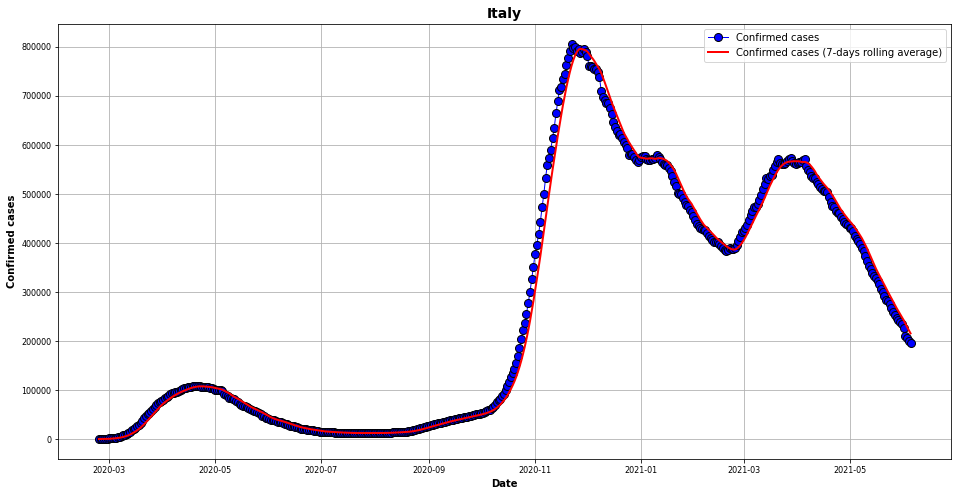

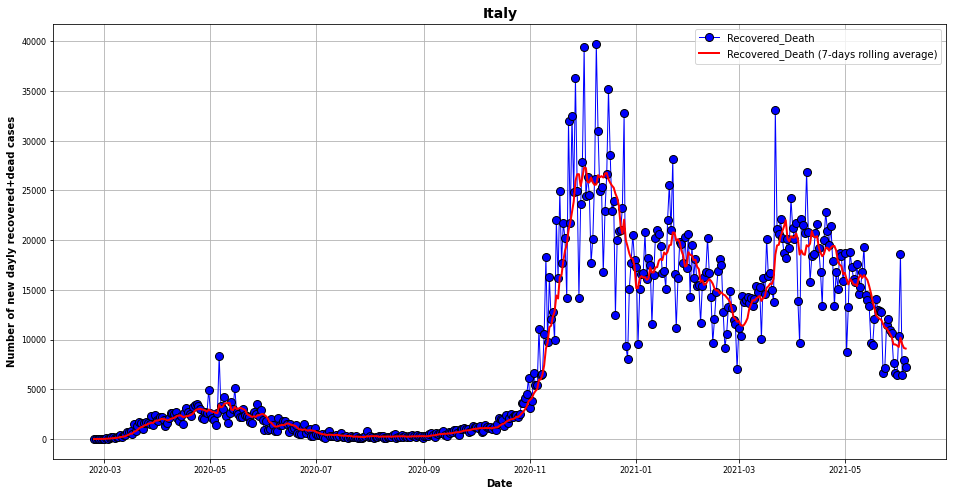

In [49]:
# save figure with plot from january
plt.plot(pd.to_datetime(df.Day), df.Confirmed, 'bo-', lw=1, mfc='b', mec='k', label='Confirmed cases')
plt.plot(pd.to_datetime(df.Day), df.Confirmed_smooth, 'r', lw=2, label='Confirmed cases (7-days rolling average)')
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

plt.plot(pd.to_datetime(df.Day), df.Recovered_Death, 'bo-', lw=1, mfc='b', mec='k', label='Recovered_Death')
plt.plot(pd.to_datetime(df.Day), df.Recovered_Death_smooth, 'r', lw=2, label='Recovered_Death (7-days rolling average)')
ymin, ymax = plt.ylim()
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("recovered_death_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

## Fit ending before peak data
fit from 2020-02-27 to 2020-03-29 with confinement measure aplied on 2020-03-11

In [9]:
filehandler = open('../Advanced-statistics/Results/ita/first_wave/results_before_peak_ita.pkl', 'rb')
res_1 = pickle.load(filehandler)

In [65]:
df[df.Confirmed_smooth == df[df.Day > '2020.10.10'].Confirmed_smooth.max()]

,Day,Confirmed,Recovered,Death,Confirmed_smooth,Recovered_Death,Recovered_Death_smooth
277,2020.11.27,787893,696647,53677,795480.428571,36294.0,25961.857143


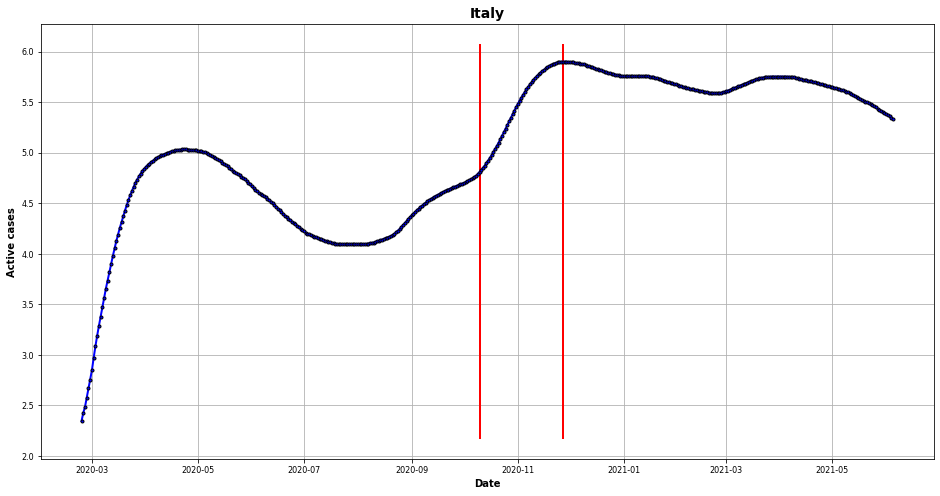

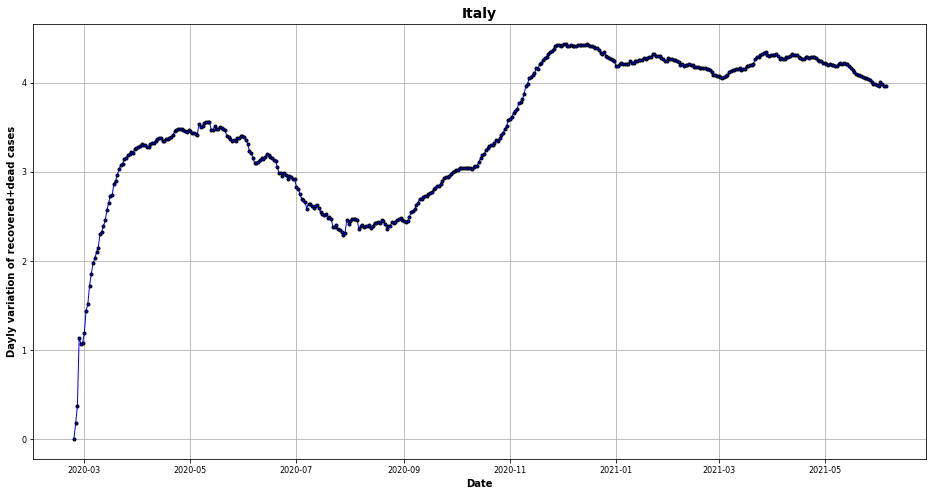

In [66]:
def doubling_time(N0, tau_d, t):
    return N0 + t / tau_d * np.log(2)


plt.plot(pd.to_datetime(df.Day), res_1['I'] / np.log(10), 'bo-', lw=2, markersize=3, mfc='b', mec='k', label='Active cases')
#plt.plot(pd.to_datetime(df.Day)[:15], doubling_time(res_1['I0'], 1./0.24, np.arange(15)))
ymin, ymax = plt.ylim()
plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.10.10']), ymin, ymax, color='r')
plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.11.27']), ymin, ymax, color='r')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.grid()
#plt.xlim(pd.to_datetime(df.Day[df.Day == '2020.09.01']), pd.to_datetime(df.Day[df.Day == '2020.11.20']))
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
#plt.xlim(pd.to_datetime(df.Day)[0], pd.to_datetime(df.Day)[50])
plt.show()


plt.plot(pd.to_datetime(df.Day), res_1['X'] / np.log(10), 'bo-', lw=1, markersize=3, mfc='b', mec='k', label='Recovered_Death new dayly cases')
plt.xlabel('Date')
plt.ylabel('Dayly variation of recovered+dead cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.grid()
#plt.xlim(pd.to_datetime(df.Day)[0], pd.to_datetime(df.Day)[10])
#plt.savefig("recovered_death_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

In [6]:
f, t = np.unique((res_1['rmu'] * (res_1['p'] + res_1['q'])) > (res_1['beta'] * res_1['p']), return_counts=True)[1]
t / (t + f)

0.531296

In [65]:
def median_sd(x):
    median = np.percentile(x, 50)
    sd = np.sqrt(np.mean((x - median) ** 2))
    return sd

func_dict = {
    "median": lambda x: np.percentile(x, 50),
    "median_std": median_sd,
    "2.5%_hdi": lambda x: np.percentile(x, 2.5),
    "97.5%_hdi": lambda x: np.percentile(x, 97.5),
}

subset = {key: value for key, value in res_1.items() if key in ['beta', 'rmu', 'q', 'p', 'tauI', 'tauX']}

idata = az.from_pyjags(subset)
param = az.summary(idata, round_to=4, var_names=['beta', 'rmu', 'q', 'p', 'tauI', 'tauX'],
                    stat_funcs=func_dict)

In [66]:
param[['median', 'sd', '2.5%_hdi', '97.5%_hdi', 'r_hat']]

,median,sd,2.5%_hdi,97.5%_hdi,r_hat
beta,0.2416,0.0025,0.2368,0.2468,1.0001
rmu,0.0287,0.0019,0.0253,0.0327,1.0001
q,0.0469,0.0026,0.0434,0.0536,1.0003
p,0.0059,0.0063,0.0002,0.0233,1.0003
tauI,319.6641,79.5885,189.3054,499.7330,1.0000
tauX,6.5936,1.5849,3.9820,10.1682,1.0000


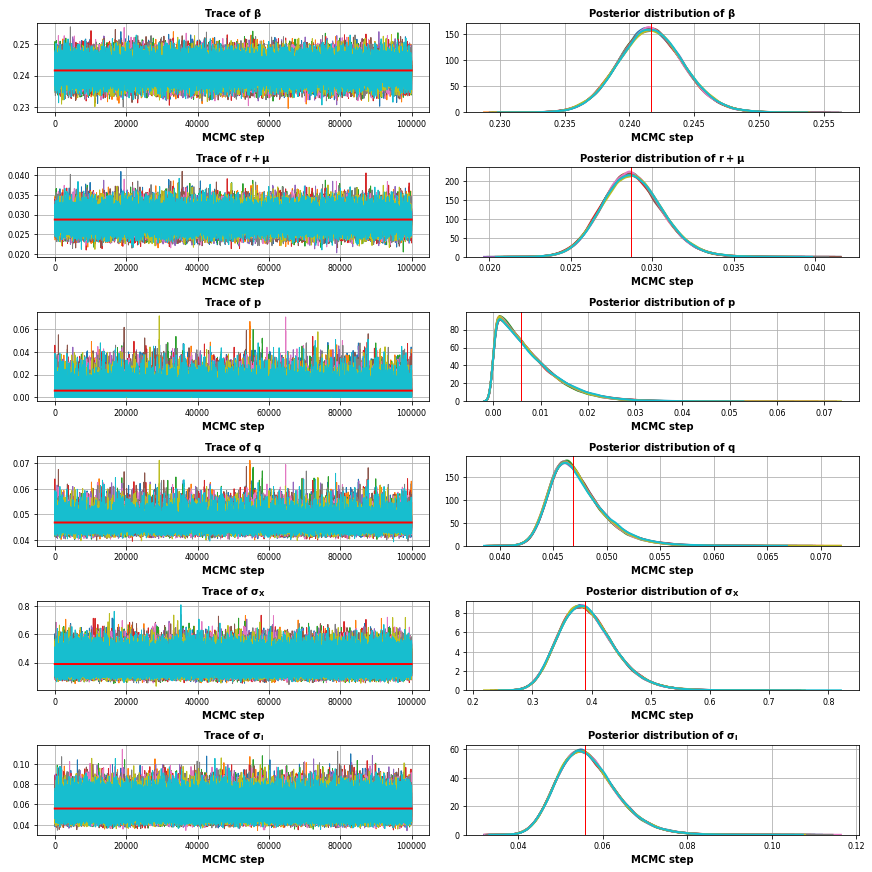

In [7]:
plot_summary(res_1)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/plot_summary_before_peak_ita.png", quality=100, transparent=True, dpi=400)

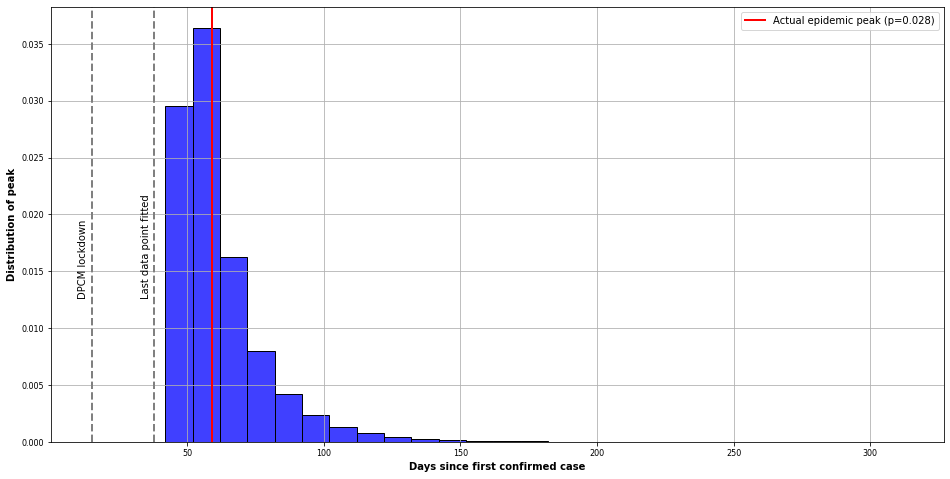

In [9]:
peak_posterior(res_1, offset=5)
plt.grid()
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/peak_posterior.png", quality=100, transparent=True, dpi=400)

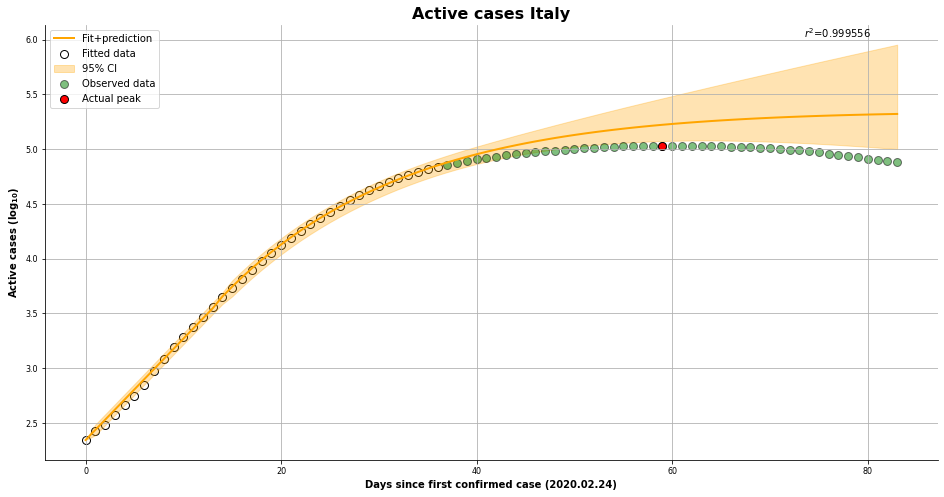

In [14]:
plot_results(res_1, ci=95, Y=True, Z=False, observed=True)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/active_cases_before.png", quality=100, transparent=True, dpi=400)

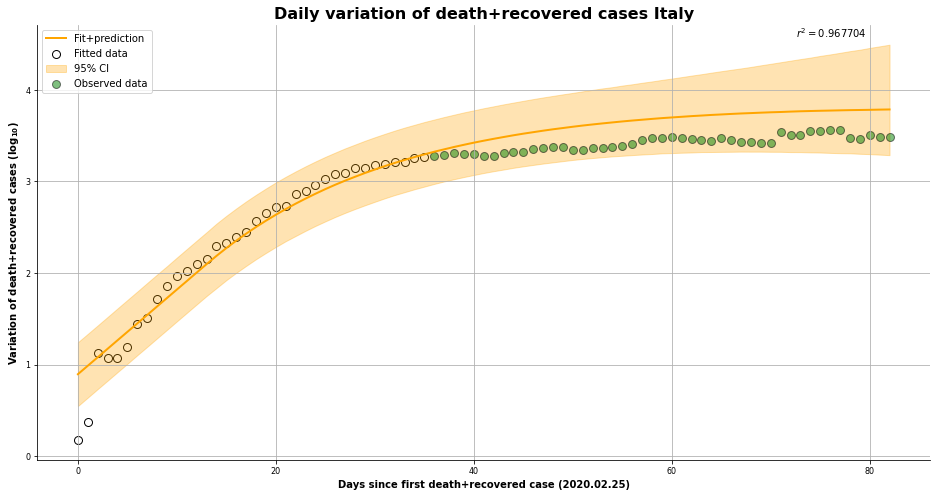

In [15]:
plot_results(res_1, ci=95, Y=False, Z=True, observed=True)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/death_recovered_before.png", quality=100, transparent=True, dpi=400)

## Fit ending after peak data for the daily number of active cases

In [67]:
filehandler = open('../Advanced-statistics/Results/ita/first_wave/results_after_peak_ita.pkl', 'rb')
res_2 = pickle.load(filehandler)

In [70]:
subset2 = {key: value for key, value in res_2.items() if key in ['beta', 'rmu', 'q', 'p', 'tauI', 'tauX']}

idata2 = az.from_pyjags(subset2)
param2 = az.summary(idata2, round_to=4, var_names=['beta', 'rmu', 'q', 'p', 'tauI', 'tauX'],
                    stat_funcs=func_dict)

In [71]:
param2[['median', 'sd', '2.5%_hdi', '97.5%_hdi', 'r_hat']]

,median,sd,2.5%_hdi,97.5%_hdi,r_hat
beta,0.2434,0.0018,0.2399,0.2469,1.0001
rmu,0.0274,0.0012,0.0252,0.0299,1.0002
q,0.0493,0.0008,0.0478,0.0508,1.0002
p,0.0002,0.0003,0.0000,0.0012,1.0000
tauI,344.1390,66.9064,230.2392,491.7680,1.0000
tauX,9.4909,1.7995,6.4045,13.4366,1.0000


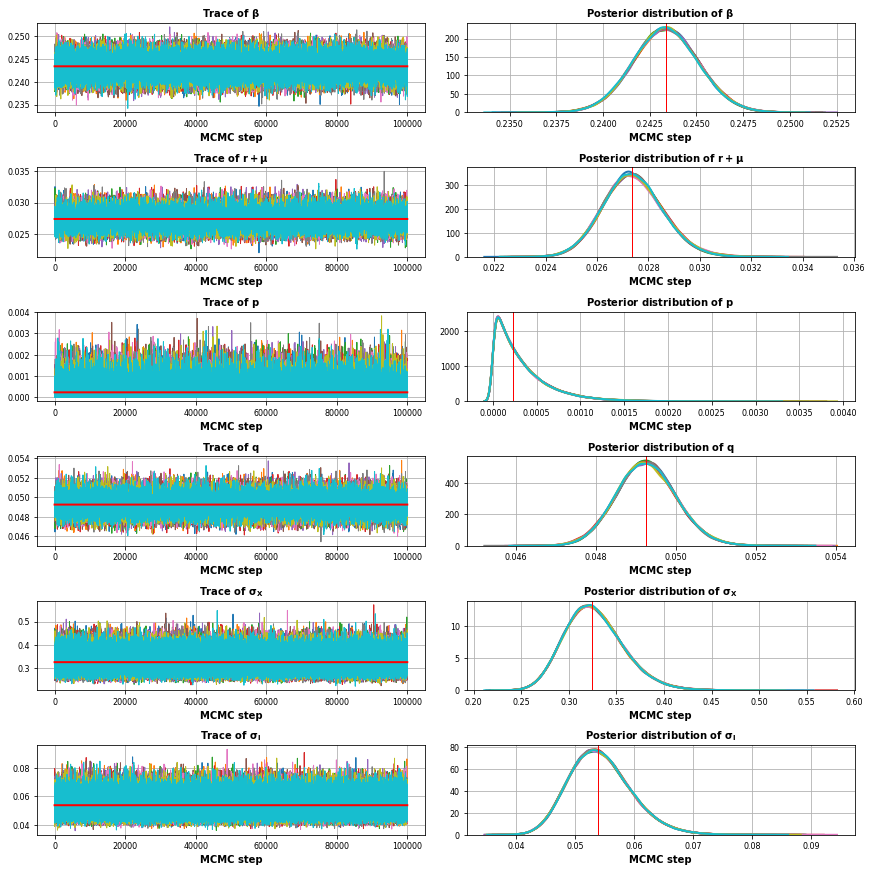

In [17]:
plot_summary(res_2)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/plot_summary_after_peak_ita.png", quality=100, transparent=True, dpi=400)

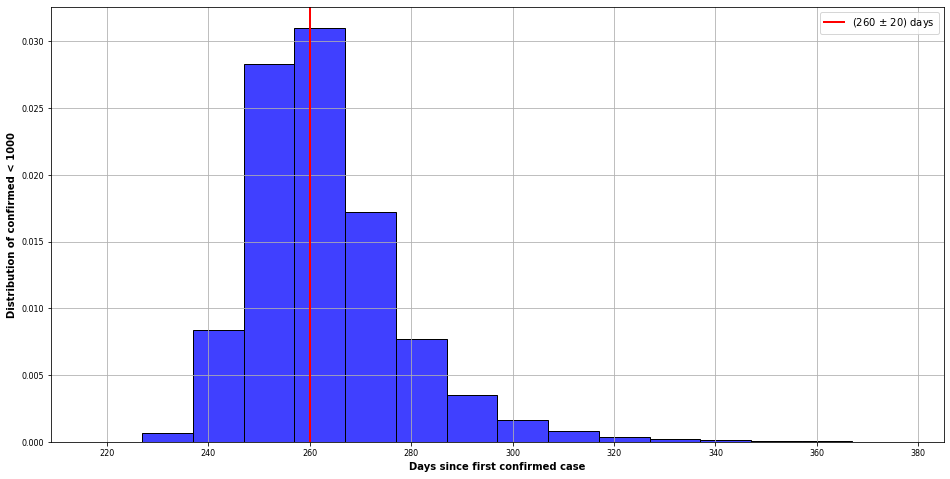

In [18]:
end_epidemic_plot(res_2, '2021.03.01')
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/end_epidemic_posterior.png", quality=100, transparent=True, dpi=400)

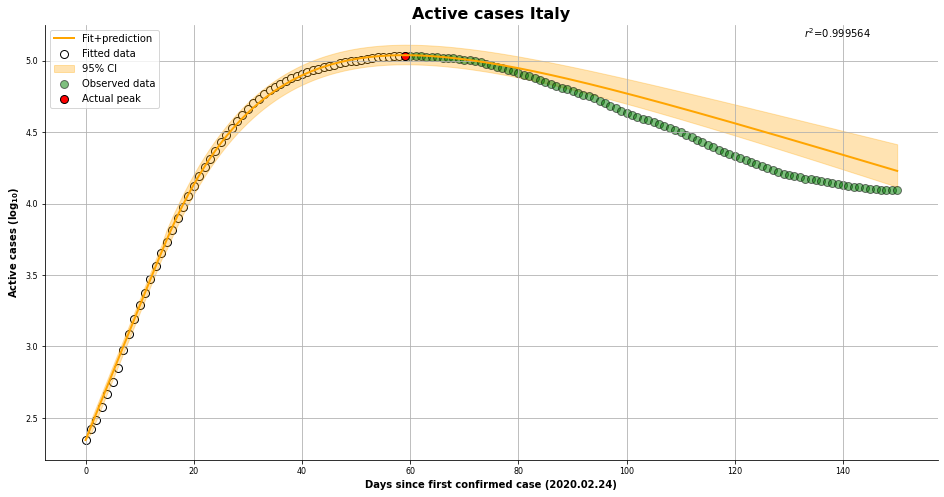

In [19]:
plot_results(res_2, ci=95, Y=True, Z=False, observed=True)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/active_cases_after.png", quality=100, transparent=True, dpi=400)

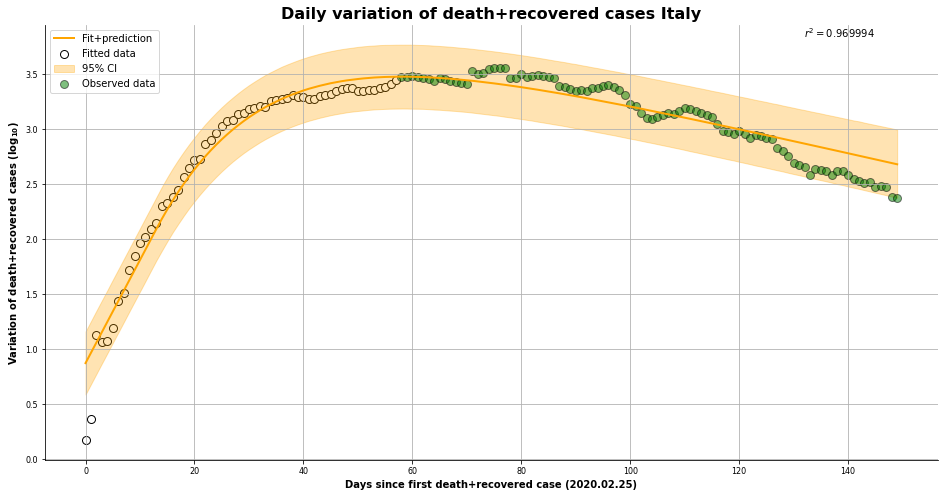

In [20]:
plot_results(res_2, ci=95, Y=False, Z=True, observed=True)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/death_recovered_after.png", quality=100, transparent=True, dpi=400)

In [96]:
filehandler = open('../Advanced-statistics/Results/ita/second_wave/results_before_peak_ita.pkl', 'rb')
res_3 = pickle.load(filehandler)

In [97]:
subset = {key: value for key, value in res_3.items() if key in ['beta', 'rmu', 'q', 'p', 'tauI', 'tauX']}

def median_sd(x):
    median = np.percentile(x, 50)
    sd = np.sqrt(np.mean((x - median) ** 2))
    return sd

func_dict = {
    "median": lambda x: np.percentile(x, 50),
    "median_std": median_sd,
    "2.5%_hdi": lambda x: np.percentile(x, 2.5),
    "97.5%_hdi": lambda x: np.percentile(x, 97.5),
}

idata = az.from_pyjags(subset)
param = az.summary(idata, round_to=4, var_names=['beta', 'rmu', 'q', 'p', 'tauI', 'tauX'],
                    stat_funcs=func_dict)

param[['median', 'sd', '2.5%_hdi', '97.5%_hdi', 'r_hat']]

,median,sd,2.5%_hdi,97.5%_hdi,r_hat
beta,0.0844,0.0008,0.0829,0.0859,1.0
rmu,0.0147,0.0004,0.0140,0.0154,1.0
q,0.9319,0.5546,0.1717,2.2800,1.0
p,3.4514,1.2413,0.5710,4.9335,1.0
tauI,356.3261,94.0222,203.9390,570.0044,1.0
tauX,53.6036,13.6706,31.3112,84.5453,1.0


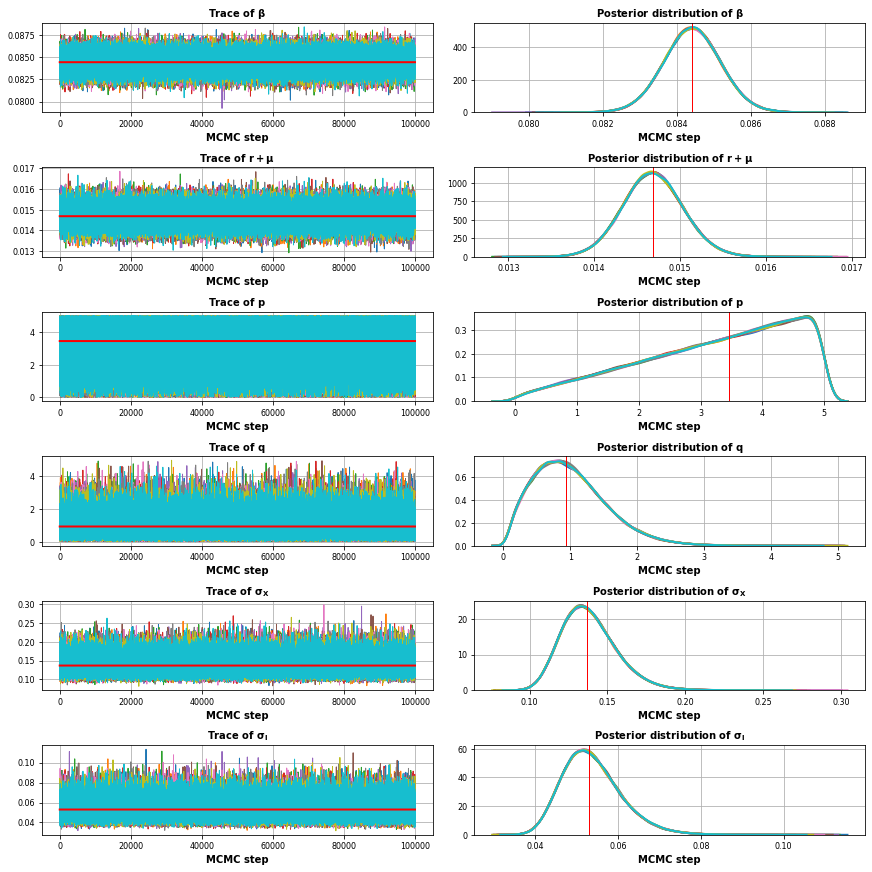

In [98]:
plot_summary(res_3)

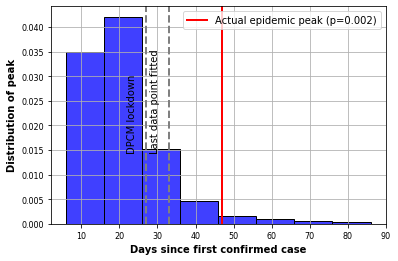

In [99]:
peak_posterior(res_3, offset=5)
plt.grid()

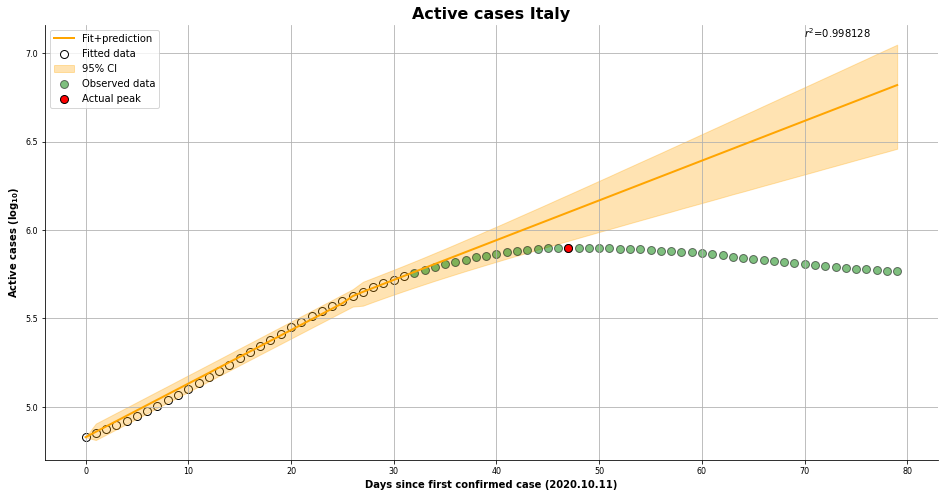

In [100]:
plot_results(res_3, ci=95, Y=True, Z=False, observed=True)

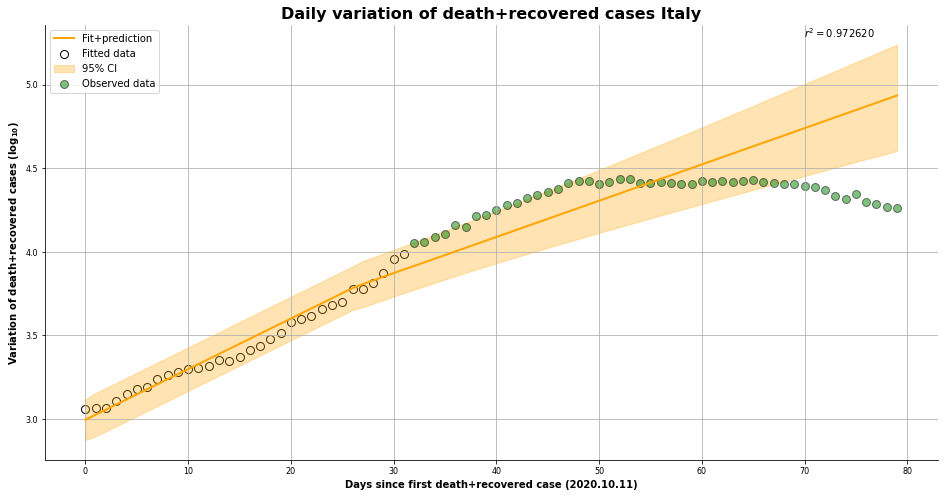

In [101]:
plot_results(res_3, ci=95, Y=False, Z=True, observed=True)

In [102]:
f, t = np.unique((res_3['rmu'] * (res_3['p'] + res_3['q'])) > (res_3['beta'] * res_3['p']), return_counts=True)[1]
t / (t + f) * 100

0.0606

In [89]:
filehandler = open('../Advanced-statistics/Results/ita/second_wave/results_after_peak_ita.pkl', 'rb')
res_4 = pickle.load(filehandler)

In [103]:
subset = {key: value for key, value in res_4.items() if key in ['beta', 'rmu', 'q', 'p', 'tauI', 'tauX']}

idata = az.from_pyjags(subset)
param = az.summary(idata, round_to=4, var_names=['beta', 'rmu', 'q', 'p', 'tauI', 'tauX'],
                    stat_funcs=func_dict)

param[['median', 'sd', '2.5%_hdi', '97.5%_hdi', 'r_hat']]


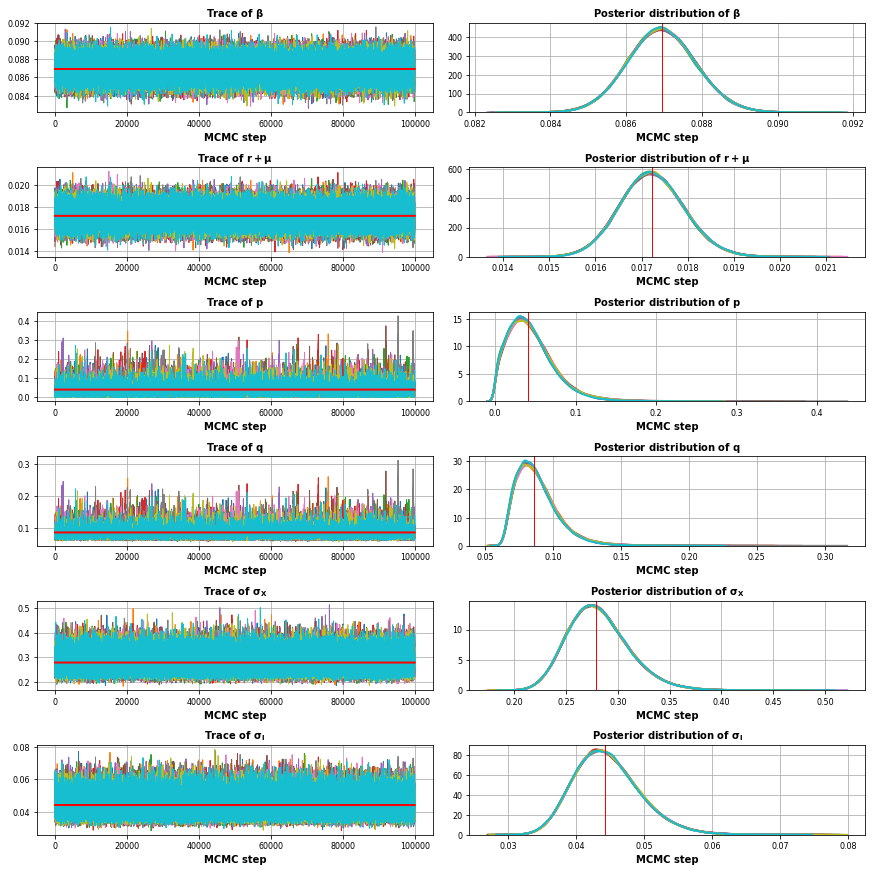

In [91]:
plot_summary(res_4)

In [93]:
end_epidemic_plot(res_4, '2021.11.14')

ValueError: cannot convert float NaN to integer

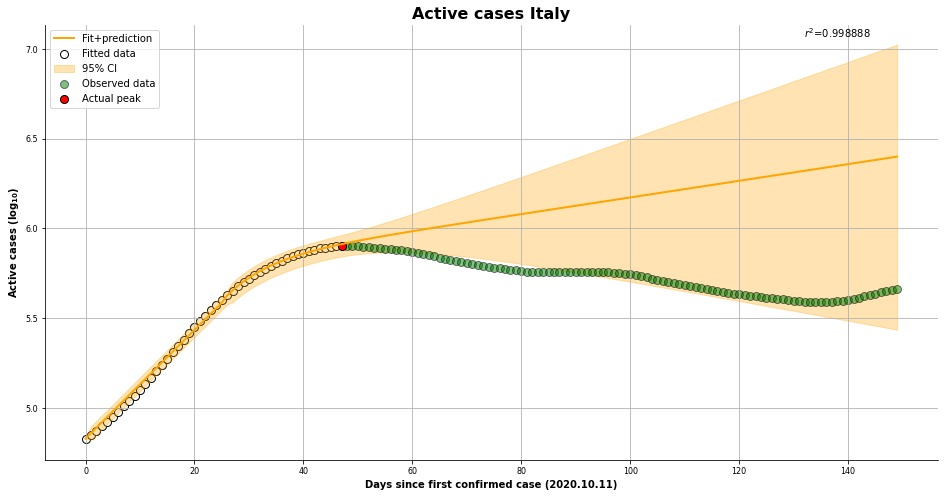

In [94]:
plot_results(res_4, ci=95, Y=True, Z=False, observed=True)

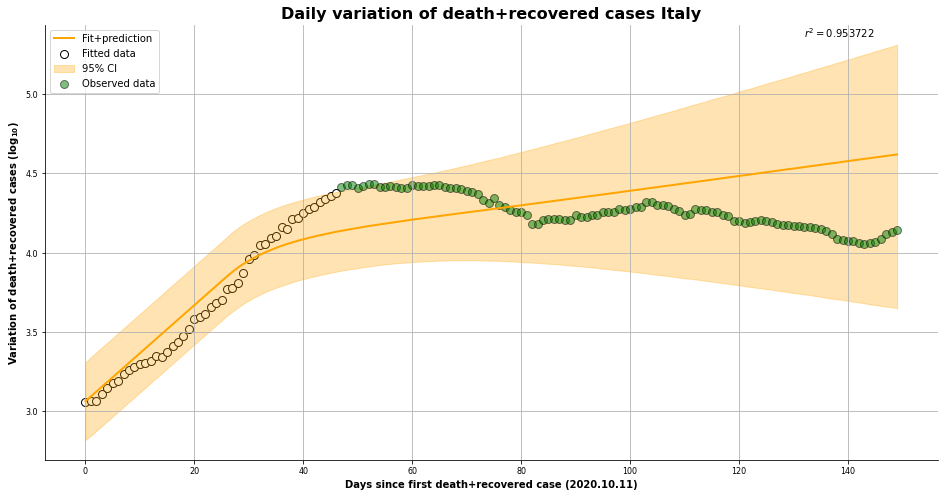

In [95]:
plot_results(res_4, ci=95, Y=False, Z=True, observed=True)